# Selection of a Proper Time Step
## System description - OSP Quarter Truck Simulation
The system is illustrated in the figure below.

![System Model](system_model.PNG)

## Loading FMU
First, we will create FMU instances. Note that interfaces from OSP-IS such as a LinearMechanicalPort
will be created because there are XXX_OspModelDescription.xml files in the same folder as the
fmus.

In [9]:
import os
from pyOSPParser.system_configuration import OspVariableEndpoint
from pycosim.osp_command_line_interface import LoggingLevel, SimulationError
from pycosim.simulation import FMU, SimulationConfiguration
import matplotlib.pyplot as plt

PATH_TO_DIR = os.getcwd()

PATH_TO_CHASSIS = os.path.join(PATH_TO_DIR, '..', 'fmus', 'osp_truck_simulation', 'chassis.fmu')
PATH_TO_WHEEL = os.path.join(PATH_TO_DIR, '..', 'fmus', 'osp_truck_simulation', 'wheel.fmu')
PATH_TO_GROUND = os.path.join(PATH_TO_DIR, '..', 'fmus', 'osp_truck_simulation', 'ground.fmu')

chassis_fmu = FMU(PATH_TO_CHASSIS)
wheel_fmu = FMU(PATH_TO_WHEEL)
ground_fmu = FMU(PATH_TO_GROUND)

# Inspecting the FMUs
for fmu in [chassis_fmu, wheel_fmu, ground_fmu]:
    print('---------------')
    print(fmu.name)
    print(f'  inputs: {fmu.get_input_names()}')
    print(f'  outputs: {fmu.get_output_names()}')
    print(f'  variable_groups: {fmu.get_variable_group_names()}')
    print(f'  parameters: {fmu.get_parameter_names()}')
    print(f'  others: {fmu.get_other_variable_names()}')

---------------
chassis
  inputs: ['p.f']
  outputs: ['p.e', 'zChassis']
  variable_groups: ['linear mechanical port']
  parameters: ['C.mChassis', 'C.kChassis', 'I1.mChassis', 'R.dChassis', 'Se1.mChassis', 'C.zDeltaInit', 'I1.moment_initial', 'I1.zChassisInit']
  others: ['C.p.e', 'OneJunction2.flow', 'OneJunction2.p1.e', 'OneJunction2.p2.e', 'OneJunction2.p3.e', 'OneJunction2.p1.f', 'OneJunction2.p2.f', 'OneJunction2.p3.f', 'OneJunction5.flow', 'OneJunction5.p1.e', 'OneJunction5.p2.e', 'OneJunction5.p3.e', 'OneJunction5.p1.f', 'OneJunction5.p2.f', 'OneJunction5.p3.f', 'QSensor.p1.e', 'QSensor.p2.e', 'QSensor.p2.f', 'R.p.e', 'R.p.f', 'Se1.p.e', 'Se1.p.f', 'Se1.flow', 'ZeroJunction6.effort', 'ZeroJunction6.p1.e', 'ZeroJunction6.p2.e', 'ZeroJunction6.p3.e', 'ZeroJunction6.p1.f', 'ZeroJunction6.p2.f', 'ZeroJunction6.p3.f', 'C.p.f', 'C.zDelta', 'I1.p.e', 'I1.moment', 'I1.p.f', 'I1.zChassis', 'QSensor.p1.f', 'QSensor.q']
---------------
wheel
  inputs: ['p.f', 'p1.e']
  outputs: ['p.e', 'p

### Create a simulation setup and configuring the system

In [10]:
# Create a simulation setup with a empty system inside
sim_config = SimulationConfiguration()

# Add components to the system
sim_config.add_component(name='chassis', fmu=chassis_fmu)
sim_config.add_component(name='wheel', fmu=wheel_fmu)
sim_config.add_component(name='ground', fmu=ground_fmu)

# Add connections between components
sim_config.add_connection(
    source=OspVariableEndpoint(simulator='chassis', name='linear mechanical port'),
    target=OspVariableEndpoint(simulator='wheel', name='chassis port'),
    group=True
)
sim_config.add_connection(
    source=OspVariableEndpoint(simulator='wheel', name='ground port'),
    target=OspVariableEndpoint(simulator='ground', name='linear mechanical port'),
    group=True
)

# Set parameters as initial value setting
sim_config.add_update_initial_value(
    component_name='chassis', variable='C.mChassis', value=400, type_value=float
)
sim_config.add_update_initial_value(
    component_name='chassis', variable='C.kChassis', value=15000, type_value=float
)
sim_config.add_update_initial_value(
    component_name='chassis', variable='R.dChassis', value=1000, type_value=float
)
sim_config.add_update_initial_value(
    component_name='wheel', variable='C.mWheel', value=40, type_value=float
)
sim_config.add_update_initial_value(
    component_name='wheel', variable='C.kWheel', value=150000, type_value=float
)
sim_config.add_update_initial_value(
    component_name='wheel', variable='R.dWheel', value=0, type_value=float
)

InitialValues(component='wheel', variable='R.dWheel', value=0)

## Run simulation and show the result
Now we can set the logging configuration and run simulation. We will run simulation
for three different global time steps: 0.01, 0.001, and 0.0001 seconds to see how error can be
reduced with proper selection of a time step.

In [11]:
# Set logging configuratoin
sim_config.add_logging_variable(component_name='chassis', variable_name='zChassis')
sim_config.add_logging_variable(component_name='wheel', variable_name='zWheel')
sim_config.add_logging_variable(component_name='ground', variable_name='zGround')

True

In [12]:
# Run simulation
sim_config.set_base_step_size(0.01)
output = sim_config.run_simulation(
    duration=10, logging_level=LoggingLevel.info
)
result_0_01 = output.result
if len(output.error) > 0:
    raise SimulationError(f'An error or errors occurred during the simulation: {output.error}')
print(output.log)

Deploying the logging configuration.
Output csv files will be saved in the following directory: C:\Users\keviny\AppData\Local\Temp\pycosim_tmp\sim_fc7811ac-ab6f-49b9-ba96-a8e7b3d501df\.
Simulation will run until 10.000000 seconds.
Running simulation.
info: Using cache directory: "C:\Users\keviny\AppData\Local\cosim"
info: [FMI Library: FMILIB] Loading 'win64' binary with 'default' platform types
info: [FMI Library: FMILIB] Loading 'win64' binary with 'default' platform types
info: [FMI Library: FMILIB] Loading 'win64' binary with 'default' platform types
info: Logging variable: chassis:zChassis
info: Logging variable: wheel:zWheel
info: Logging variable: ground:zGround
info: 10% complete, t=1.000000
info: 20% complete, t=2.000000
info: 30% complete, t=3.000000
info: 40% complete, t=4.000000
info: 50% complete, t=5.000000
info: 60% complete, t=6.000000
info: 70% complete, t=7.000000
info: 80% complete, t=8.000000
info: 90% complete, t=9.000000
info: 100% complete, t=10.000000




Now we set the time step 0.001 second. We will also set the decimation factor for logging 10 to
reduce the data size of logged outputs.

In [13]:
# Set decimation factor
sim_config.set_decimation_factor(component_name='chassis', decimation_factor=10)
sim_config.set_decimation_factor(component_name='wheel', decimation_factor=10)
sim_config.set_decimation_factor(component_name='ground', decimation_factor=10)

# Run simulation
sim_config.set_base_step_size(0.001)
output = sim_config.run_simulation(
    duration=10, logging_level=LoggingLevel.info
)
result_0_001 = output.result
if len(output.error) > 0:
    raise SimulationError(f'An error or errors occurred during the simulation: {output.error}')
print(output.log)

Deploying the logging configuration.
Output csv files will be saved in the following directory: C:\Users\keviny\AppData\Local\Temp\pycosim_tmp\sim_c6d6ec72-3513-4b19-a31a-402d838d56fb\.
Simulation will run until 10.000000 seconds.
Running simulation.
info: Using cache directory: "C:\Users\keviny\AppData\Local\cosim"
info: [FMI Library: FMILIB] Loading 'win64' binary with 'default' platform types
info: [FMI Library: FMILIB] Loading 'win64' binary with 'default' platform types
info: [FMI Library: FMILIB] Loading 'win64' binary with 'default' platform types
info: Logging variable: chassis:zChassis
info: Logging variable: wheel:zWheel
info: Logging variable: ground:zGround
info: 10% complete, t=1.000000
info: 20% complete, t=2.000000
info: 30% complete, t=3.000000
info: 40% complete, t=4.000000
info: 50% complete, t=5.000000
info: 60% complete, t=6.000000
info: 70% complete, t=7.000000
info: 80% complete, t=8.000000
info: 90% complete, t=9.000000
info: 100% complete, t=10.000000




Now we set the time step 0.0001 second. We will also set the decimation factor for logging 100 to
reduce the data size of logged outputs.

In [14]:
# Set decimation factor
sim_config.set_decimation_factor(component_name='chassis', decimation_factor=100)
sim_config.set_decimation_factor(component_name='wheel', decimation_factor=100)
sim_config.set_decimation_factor(component_name='ground', decimation_factor=100)

# Run simulation
sim_config.set_base_step_size(0.0001)
output = sim_config.run_simulation(
    duration=10, logging_level=LoggingLevel.info
)
result_0_0001 = output.result
if len(output.error) > 0:
    raise SimulationError(f'An error or errors occurred during the simulation: {output.error}')
print(output.log)

Deploying the logging configuration.
Output csv files will be saved in the following directory: C:\Users\keviny\AppData\Local\Temp\pycosim_tmp\sim_efd4e15c-f209-4e0d-8782-17d29e82c036\.
Simulation will run until 10.000000 seconds.
Running simulation.
info: Using cache directory: "C:\Users\keviny\AppData\Local\cosim"
info: [FMI Library: FMILIB] Loading 'win64' binary with 'default' platform types
info: [FMI Library: FMILIB] Loading 'win64' binary with 'default' platform types
info: [FMI Library: FMILIB] Loading 'win64' binary with 'default' platform types
info: Logging variable: chassis:zChassis
info: Logging variable: wheel:zWheel
info: Logging variable: ground:zGround
info: 10% complete, t=1.000000
info: 20% complete, t=2.000000
info: 30% complete, t=3.000000
info: 40% complete, t=4.000000
info: 50% complete, t=5.000000
info: 60% complete, t=6.000000
info: 70% complete, t=7.000000
info: 80% complete, t=8.000000
info: 90% complete, t=9.000000
info: 100% complete, t=10.000000




##Result

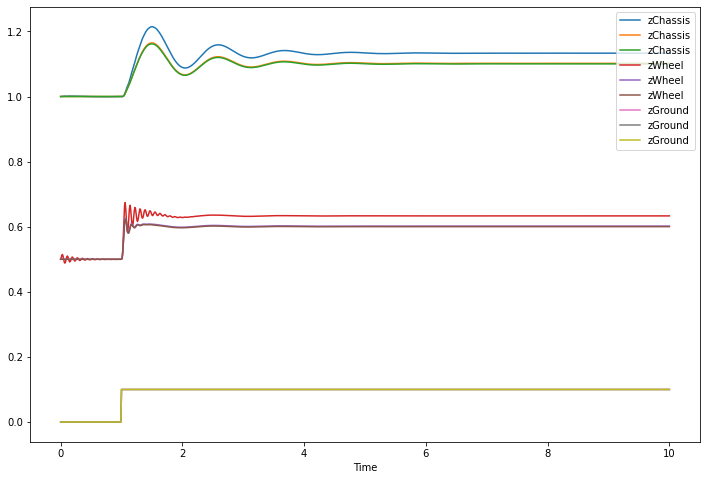

In [15]:
# Plot result
fig, ax = plt.subplots()
for comp_name in ['chassis', 'wheel', 'ground']:
    result_0_01[comp_name].drop(['StepCount'], axis=1).plot(x='Time', ax=ax, figsize=(12,8))
    result_0_001[comp_name].drop(['StepCount'], axis=1).plot(x='Time', ax=ax, figsize=(12, 8))
    result_0_0001[comp_name].drop(['StepCount'], axis=1).plot(x='Time', ax=ax, figsize=(12, 8))
plt.show()

In [16]:
print('Final position of ')
print(f' - zChassis(0.01): {result_0_01["chassis"]["zChassis"].values[-1]}')
print(f' - zChassis(0.001): {result_0_001["chassis"]["zChassis"].values[-1]}')
print(f' - zChassis(0.0001): {result_0_0001["chassis"]["zChassis"].values[-1]}')
print(f' - zWheel(0.01): {result_0_01["wheel"]["zWheel"].values[-1]}')
print(f' - zWheel(0.001): {result_0_001["wheel"]["zWheel"].values[-1]}')
print(f' - zWheel(0.0001): {result_0_0001["wheel"]["zWheel"].values[-1]}')

Final position of 
 - zChassis(0.01): 1.13319
 - zChassis(0.001): 1.10209
 - zChassis(0.0001): 1.1002100000000001
 - zWheel(0.01): 0.633274
 - zWheel(0.001): 0.6020949999999999
 - zWheel(0.0001): 0.60021


## Conclusion
We see that time step of 0.01 second introduced a noticeable error.
The bias error for of the final displacement change is approximately 33%, whereas time step
of 0.01 second resulted in 2% error. Depending on application, the time step should be
chosen between 0.001 second and 0.0001 second.